In [2]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Access a public Github repos
!rm -rf /content/MT-Small-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/MT-Small-Dataset.git

/content
Cloning into 'MT-Small-Dataset'...
remote: Enumerating objects: 1223, done.
remote: Counting objects: 100% (1223/1223), done.
remote: Compressing objects: 100% (1219/1219), done.
remote: Total 1223 (delta 4), reused 1223 (delta 4), pack-reused 0
Receiving objects: 100% (1223/1223), 14.72 MiB | 22.95 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [5]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [6]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["MT-Small-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  DataSetSummary(local_path, 0)
  local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: Benign, Số tệp: 200
-Thư mục: Malignant, Số tệp: 200
Tổng số thư mục: 2
-Thư mục: Benign, Số tệp: 3
	Tổng số thư mục: 3
	-Thư mục: Ground_Truth_Benign, Số tệp: 20
	-Thư mục: Fuzzy_Benign, Số tệp: 20
	-Thư mục: Original_Benign, Số tệp: 20
-Thư mục: Malignant, Số tệp: 3
	Tổng số thư mục: 3
	-Thư mục: Fuzzy_Malignant, Số tệp: 20
	-Thư mục: Ground_Truth_Malignant, Số tệp: 20
	-Thư mục: Original_Malignant, Số tệp: 20


In [7]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset


In [8]:
# Set the path to your dataset
dataset_path = '/content/MT-Small-Dataset/sample'
# dataset_path = '/content/MT-Small-Dataset/dataset'

Class Benign


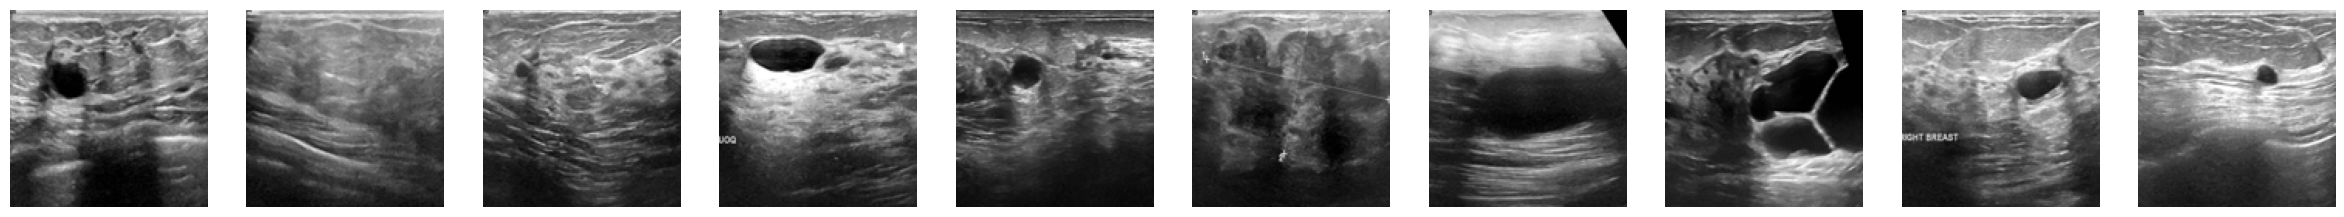

Class Malignant


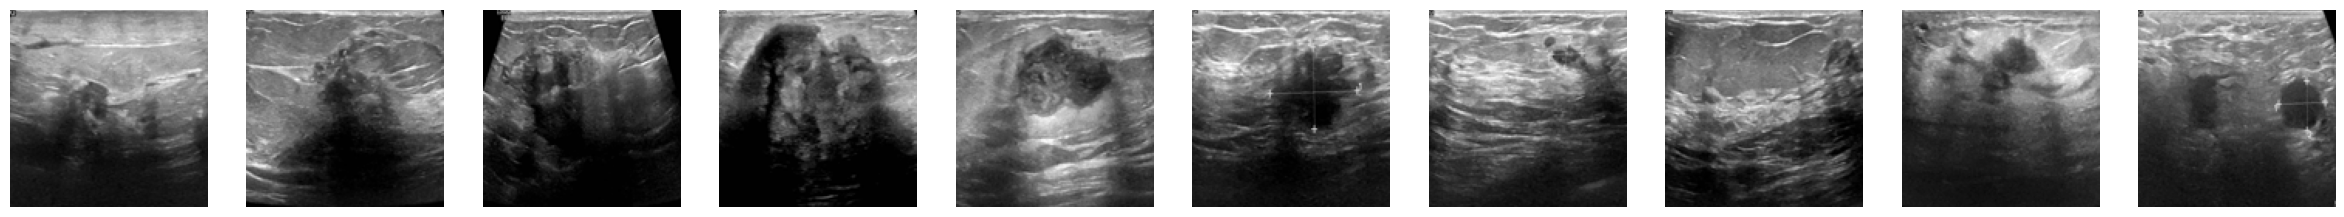

In [9]:
class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/MT-Small-Dataset/dataset')
imshow(images, 10)


In [10]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/MT-Small-Dataset/dataset/Malignant/malignant_Adjusted (1).png"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['Benign', 'Malignant'])
Image Format: PNG
Image Mode: RGB
Image Size: (128, 128) pixels (Width: 128, Height: 128)
Image Colors: [(1, (255, 255, 255)), (7, (251, 251, 251)), (8, (249, 249, 249)), (17, (247, 247, 247)), (12, (245, 245, 245)), (26, (243, 243, 243)), (25, (241, 241, 241)), (21, (239, 239, 239)), (30, (237, 237, 237)), (40, (235, 235, 235)), (51, (233, 233, 233)), (40, (231, 231, 231)), (43, (229, 229, 229)), (45, (227, 227, 227)), (50, (225, 225, 225)), (44, (223, 223, 223)), (51, (221, 221, 221)), (55, (219, 219, 219)), (61, (217, 217, 217)), (60, (215, 215, 215)), (69, (213, 213, 213)), (66, (211, 211, 211)), (49, (209, 209, 209)), (58, (207, 207, 207)), (76, (205, 205, 205)), (70, (203, 203, 203)), (79, (201, 201, 201)), (72, (199, 199, 199)), (79, (197, 197, 197)), (86, (195, 195, 195)), (63, (193, 193, 193)), (74, (189, 189, 189)), (63, (187, 187, 187)), (64, (185, 185, 185)), (50, (183, 183, 183)), (59, (181, 181, 181)), (51, (179, 179, 179)),

## USM

In [11]:
import pywt
def preprocess_func(image):
    # Unsharp Masking
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    # Bilateral Filter Denoising
    denoised_image = cv2.bilateralFilter(unsharp_mask, d=9, sigmaColor=75, sigmaSpace=75)

    # return result
    return denoised_image

In [12]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)





In [13]:
# Usage:
# dataset_path = '/content/MT-Small-Dataset/sample'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset/CLAHE_Butterworth_sample'
dataset_path = '/content/MT-Small-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset/08_08_USM'
preprocess_and_copy(dataset_path, output_path, preprocess_func)


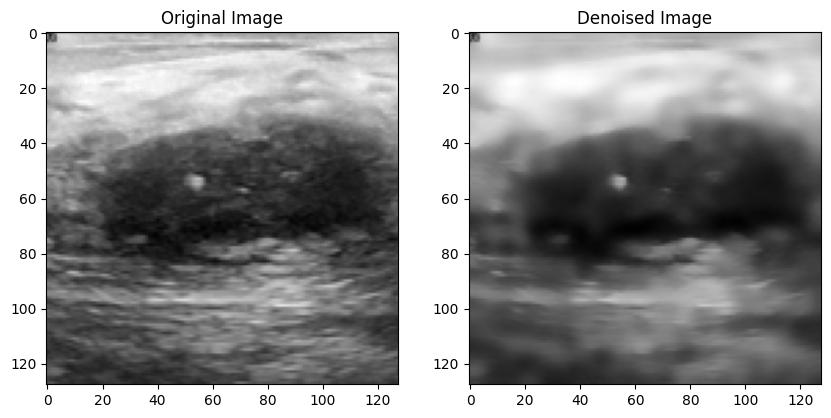

In [14]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/MT-Small-Dataset/dataset/Malignant/malignant_Adjusted (1).png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = preprocess_func(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()